# TensorFlow Tutorial: Convolutional Neural Network Visualization

This tutorial is based on:

* [Visualizing Neural Network Layer Activation Tutorial](https://medium.com/@awjuliani/visualizing-neural-network-layer-activation-tensorflow-tutorial-d45f8bf7bbc4#.nxrc684g4) and [code](https://gist.github.com/awjuliani/acde9d491658265c3fbf6a74b91518e3) by Arthur Juliani.
* [Understanding Neural Networks Through Deep Visualization](https://arxiv.org/pdf/1506.06579.pdf) by Jason Yosinski, et. al.



**Import libraries:**

In [1]:
import numpy as np 
import matplotlib as mp
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

**Load MNIST data:**

In [2]:
mnist = input_data.read_data_sets("data/", one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


**Construct graph:**

In [3]:
# Helper functions:

def init_weights(shape):
    return tf.Variable( tf.truncated_normal(shape, stddev=0.1) )

def init_bias(shape):
    return tf.Variable( tf.constant(0.1, shape=shape) )

def init_conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def init_max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='SAME')

# Layer definitions:

x            = tf.placeholder( tf.float32, [None, 784], name="x" )
y            = tf.placeholder( tf.float32, [None, 10], name="y" )

x_image      = tf.reshape(x, [-1,28,28,1])
W_conv1      = init_weights([5, 5, 1, 5])
b_conv1      = init_bias([5])
h_conv1      = tf.nn.relu(init_conv2d(x_image, W_conv1) + b_conv1)
h_pool1      = init_max_pool_2x2(h_conv1)

W_conv2      = init_weights([5, 5, 5, 5])
b_conv2      = init_bias([5])
h_conv2      = tf.nn.relu(init_conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2      = init_max_pool_2x2(h_conv2)

W_conv3      = init_weights([5, 5, 5, 20])
b_conv3      = init_bias([20])
h_conv3      = tf.nn.relu(init_conv2d(h_pool2, W_conv3) + b_conv3)

W_fc1        = init_weights([7 * 7 * 20, 10])
b_fc1        = init_bias([10])
h_conv3_flat = tf.reshape(h_conv3, [-1, 7*7*20])
keep_prob    = tf.placeholder("float")
h_conv3_drop = tf.nn.dropout(h_conv3_flat, keep_prob)
y_conv       = tf.nn.softmax(tf.matmul(h_conv3_drop, W_fc1) + b_fc1)

# Cross-entropy loss function:
loss_fn      = -tf.reduce_sum( y * tf.log( y_conv ) )

# Training operation:
train_step   = tf.train.AdamOptimizer( 1e-4 ).minimize( loss_fn )

# Accuracy operation:
accuracy     = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y_conv,1), tf.argmax(y,1)), "float"))

**Train network:**

In [4]:
# Set training parameters:
training_epochs = 10
batch_size = 10
num_examples = 10000

# Initialize variables:
init = tf.initialize_all_variables()

# Create session:
sess = tf.Session()
sess.run( init )

# Perform each training epoch:
for epoch in range( training_epochs ):
    avg_train_accuracy = 0.0
    # Get total batch count:
    total_batch_count = int( min( num_examples, mnist.train.num_examples ) / batch_size )
    # Iterate over each batch:
    for i in range( total_batch_count ):
        batch_x, batch_y = mnist.train.next_batch( batch_size )
        train_step.run(session=sess, feed_dict={x:batch_x,y:batch_y, keep_prob:0.5})
        avg_train_accuracy += accuracy.eval(session=sess, feed_dict={x:batch_x,y:batch_y, keep_prob:1.0})
    print( "Epoch: %04d, Training Accuracy = %g" % ( epoch, ( avg_train_accuracy / total_batch_count ) ) )

# Perform testing:
test_accuracy = accuracy.eval(session=sess, feed_dict={x:mnist.test.images,y:mnist.test.labels, keep_prob:1.0})
print( "Test Accuracy = %g" % ( test_accuracy ) )

Epoch: 0000, Training Accuracy = 0.5155
Epoch: 0001, Training Accuracy = 0.8459
Epoch: 0002, Training Accuracy = 0.8889
Epoch: 0003, Training Accuracy = 0.9125
Epoch: 0004, Training Accuracy = 0.9256
Epoch: 0005, Training Accuracy = 0.9431
Epoch: 0006, Training Accuracy = 0.9426
Epoch: 0007, Training Accuracy = 0.948
Epoch: 0008, Training Accuracy = 0.9517
Epoch: 0009, Training Accuracy = 0.9523
Test Accuracy = 0.9577


**Define visualization function:**

In [10]:
def plot_activations(layer,img):
    units = layer.eval(session=sess,feed_dict={x:np.reshape(img,[1,784],order='F'),keep_prob:1.0})
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    for i in xrange(0,filters):
        plt.subplot(7,6,i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

**Pick example image and visualize it:**

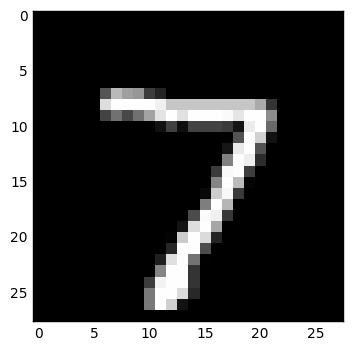

In [19]:
example_image = mnist.test.images[0]
plt.imshow( np.reshape( example_image, [28,28] ), interpolation="nearest", cmap="gray" )

**Visualize example image activations at first convolutional layer:**

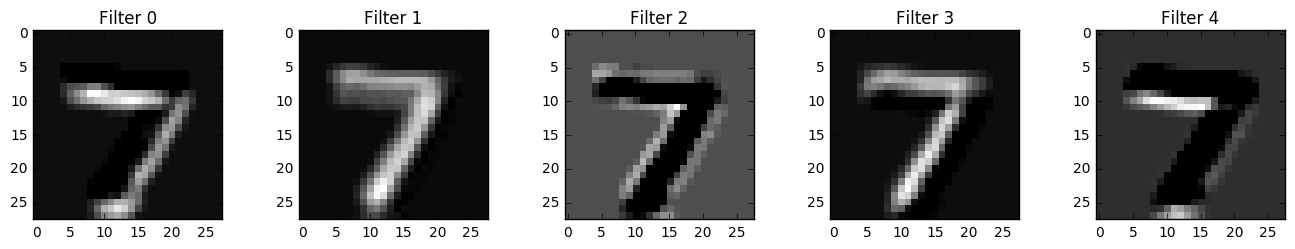

In [20]:
plot_activations( h_conv1, example_image )

**Visualize example image activations at second convolutional layer:**

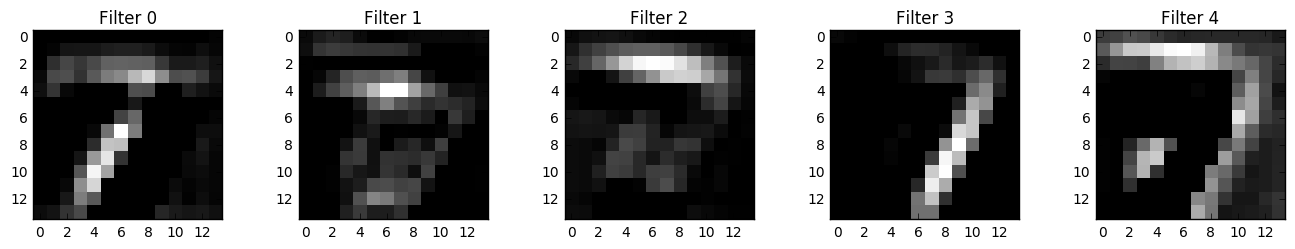

In [21]:
plot_activations( h_conv2, example_image )

**Visualize example image activations at third convolutional layer:**

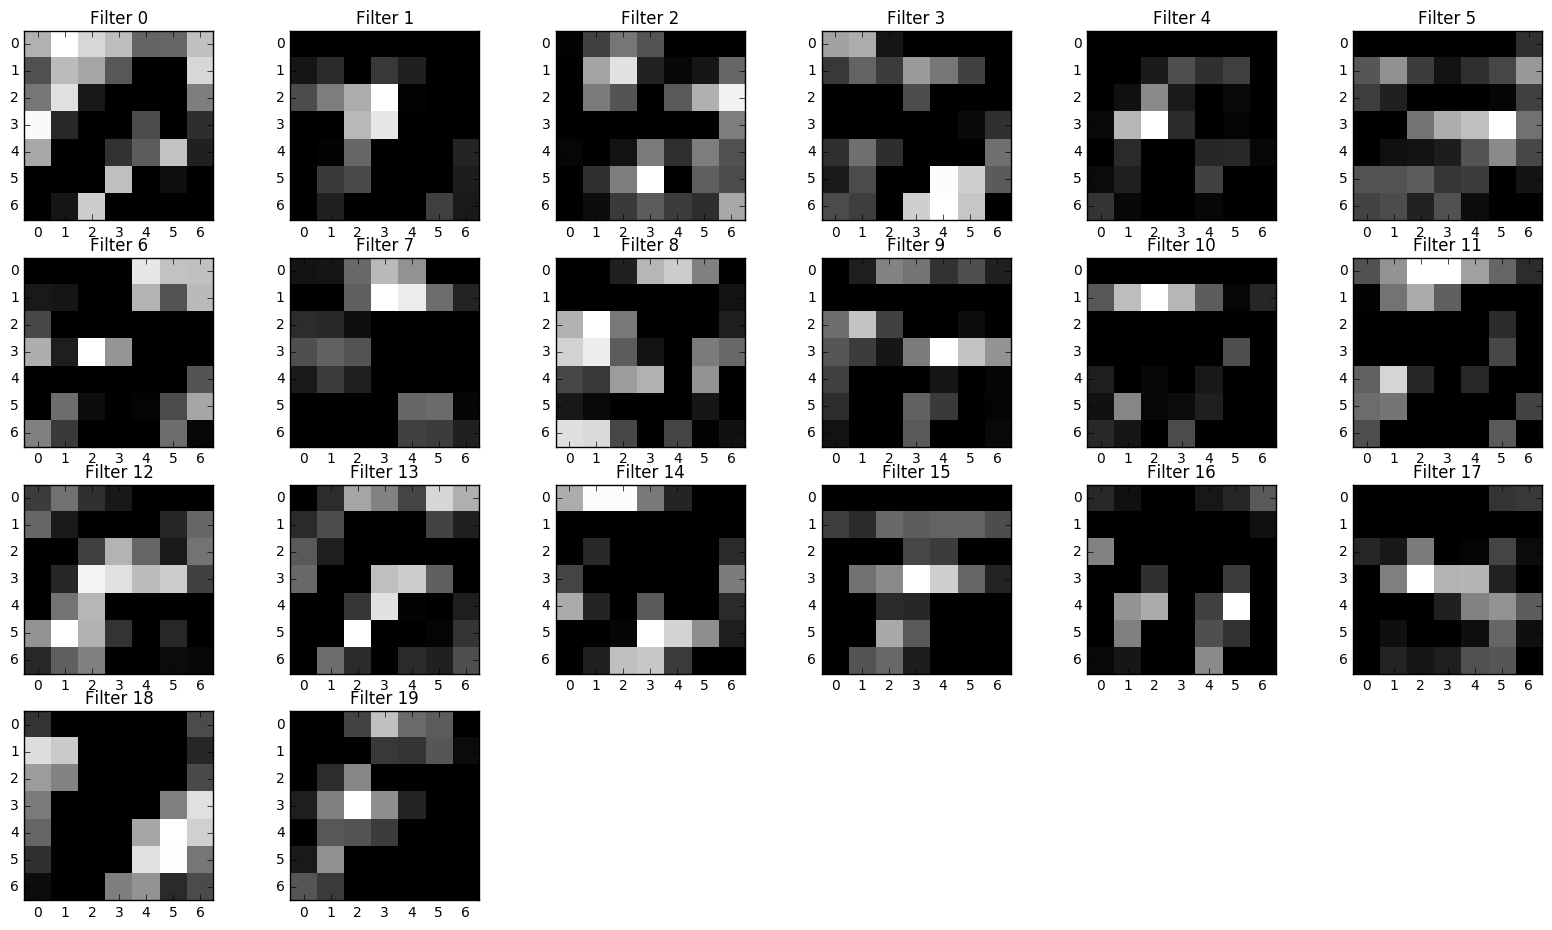

In [22]:
plot_activations( h_conv3, example_image )